In [3]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos un estilo visual agradable para los gráficos
sns.set_theme(style="whitegrid")

# Definimos la ruta correcta al archivo de producción desde la carpeta '2_notebooks/'
RUTA_DATOS_FINAL = os.path.join('..', '1_datos', '02_procesados', 'dataset_produccion.gpkg')

# Cargamos los datos en un GeoDataFrame
try:
    gdf = gpd.read_file(RUTA_DATOS_FINAL)
    print("✅ Dataset de producción cargado exitosamente.")
    print(f"Total de secciones a analizar: {len(gdf)}")
    # Mostramos las primeras 5 filas para verificar
    display(gdf.head())
except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")
    print("Verifica que el archivo 'dataset_produccion.gpkg' exista en la ruta correcta.")

✅ Dataset de producción cargado exitosamente.
Total de secciones a analizar: 63


,seccion,lista_nominal_promedio,votos_totales_acumulados,partido_dominante,pct_voto_morena,pct_voto_oposicion,competitividad,porc_genero_fem,porc_ninos,porc_futuros_votantes,...,porc_con_celular,porc_con_internet,indice_digitalizacion,GRAPROES,porc_hogares_jefa_mujer,porc_poblacion_migrante,tasa_desocupacion,porc_sin_servicios_salud,indice_movilizacion,geometry
0,254,478.458333,8258,pan,21.530027,76.253330,54.723303,51.363636,8.030303,2.424242,...,100.0,95.312500,90.798611,13.27,32.786885,40.909091,0.657895,15.151515,17.259601,"MULTIPOLYGON (((573667.542 2109247.202, 573680..."
1,255,312.541667,5749,morena,29.459169,68.498869,39.039700,53.333333,9.333333,4.533333,...,100.0,84.259259,83.333333,11.62,37.121212,38.400000,3.260870,19.466667,18.394347,"MULTIPOLYGON (((573234.809 2109055.118, 573285..."
2,202,506.177083,32137,morena,34.044820,63.552914,29.508094,50.775194,11.800172,4.909561,...,100.0,55.007474,62.381664,9.18,39.972715,30.404823,1.298701,12.790698,63.489638,"MULTIPOLYGON (((574762.376 2108138.412, 574743..."
3,200,554.500000,9001,morena,31.726496,66.548161,34.821666,50.241546,14.492754,4.347826,...,100.0,68.711656,73.619632,10.08,25.133690,38.969404,2.960526,11.594203,16.232642,"MULTIPOLYGON (((-134302.646 2092831.833, -1342..."
4,203,383.812500,12462,morena,28.871718,68.688814,39.817096,48.217317,13.412564,5.263158,...,100.0,68.831169,70.995671,9.53,35.025381,28.183362,0.996678,17.147708,32.468979,"MULTIPOLYGON (((573217.451 2107560.079, 573242..."


In [4]:
# Seleccionamos la variable que queremos auditar
variable_a_auditar = 'indice_movilizacion'

print(f"--- Estadísticas Descriptivas para '{variable_a_auditar}' ---")
display(gdf[variable_a_auditar].describe())

print("""
--- ¿Cómo interpretar este índice? ---
Recuerda: Este valor NO es un porcentaje. Un índice de 45, por ejemplo, significa que en los últimos 12 años, esa sección ha generado un acumulado de 45 votos por cada votante que tiene en su lista nominal promedio. Es una medida de la 'productividad' electoral histórica.
""")

--- Estadísticas Descriptivas para 'indice_movilizacion' ---


count    63.000000
mean     37.924406
std      17.062970
min      14.184047
25%      28.114081
50%      36.621612
75%      45.056317
max      92.609277
Name: indice_movilizacion, dtype: float64


--- ¿Cómo interpretar este índice? ---
Recuerda: Este valor NO es un porcentaje. Un índice de 45, por ejemplo, significa que en los últimos 12 años, esa sección ha generado un acumulado de 45 votos por cada votante que tiene en su lista nominal promedio. Es una medida de la 'productividad' electoral histórica.



--- Análisis Visual de 'indice_movilizacion' ---


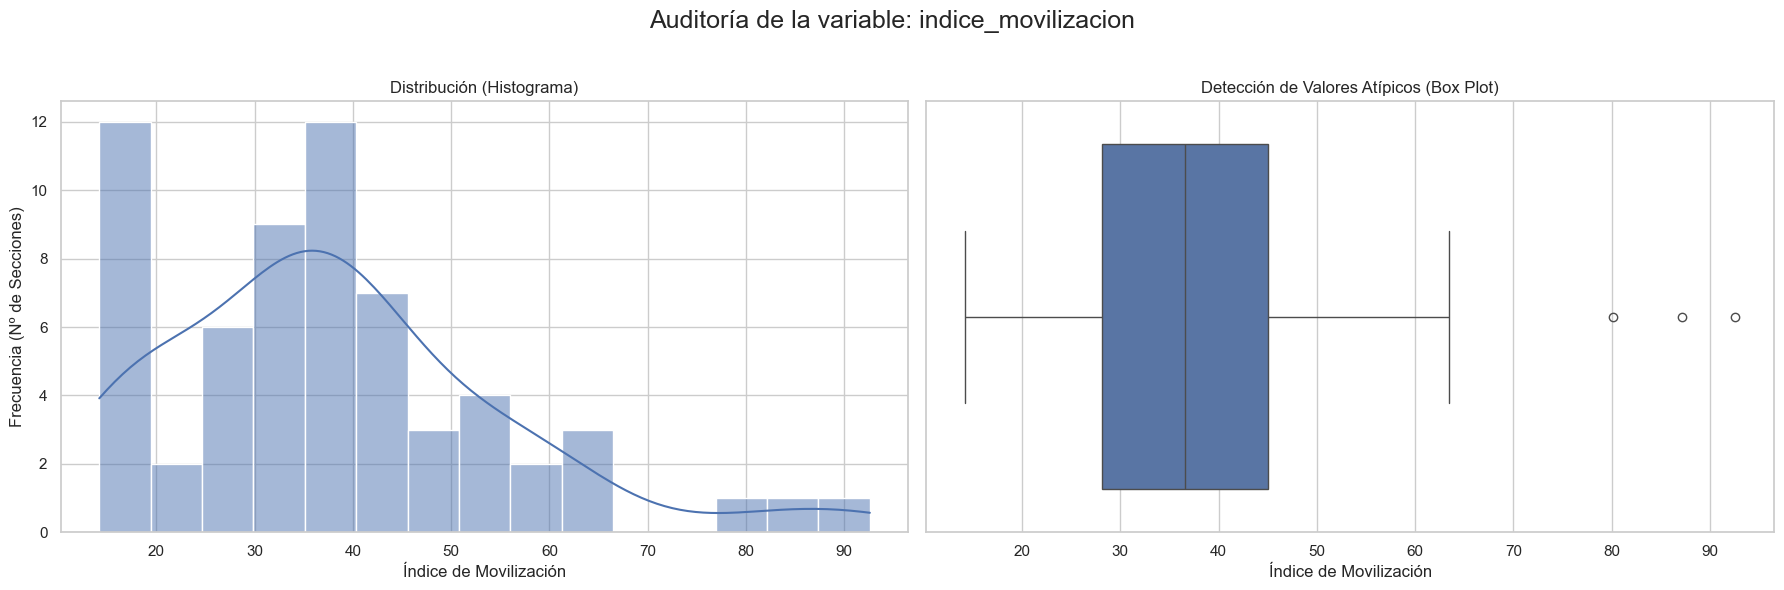

In [5]:
print(f"--- Análisis Visual de '{variable_a_auditar}' ---")

# Creamos una figura con dos gráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f'Auditoría de la variable: {variable_a_auditar}', fontsize=18)

# Gráfico 1: Histograma
sns.histplot(gdf[variable_a_auditar], kde=True, bins=15, ax=axes[0])
axes[0].set_title('Distribución (Histograma)')
axes[0].set_xlabel('Índice de Movilización')
axes[0].set_ylabel('Frecuencia (Nº de Secciones)')

# Gráfico 2: Box Plot
sns.boxplot(x=gdf[variable_a_auditar], ax=axes[1])
axes[1].set_title('Detección de Valores Atípicos (Box Plot)')
axes[1].set_xlabel('Índice de Movilización')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
print("--- Identificando Secciones Estadísticamente Atípicas ---")

# Calculamos los límites del rango "normal" usando el Rango Intercuartílico (IQR)
Q1 = gdf[variable_a_auditar].quantile(0.25)
Q3 = gdf[variable_a_auditar].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

print(f"El límite superior para considerar una sección como atípica es: {limite_superior:.2f}")

# Filtramos el DataFrame para encontrar las secciones que superan ese límite
secciones_atipicas = gdf[gdf[variable_a_auditar] > limite_superior]

if not secciones_atipicas.empty:
    print(f"\nSe encontraron {len(secciones_atipicas)} secciones con movilización estadísticamente atípica:")
    
    # Mostramos las columnas clave para nuestro diagnóstico final
    display(secciones_atipicas[['seccion', 'lista_nominal_promedio', 'votos_totales_acumulados', 'indice_movilizacion']].sort_values('indice_movilizacion', ascending=False))
else:
    print("\n✅ No se encontraron valores atípicos según el método IQR. La variable es consistente.")

--- Identificando Secciones Estadísticamente Atípicas ---
El límite superior para considerar una sección como atípica es: 70.47

Se encontraron 3 secciones con movilización estadísticamente atípica:


,seccion,lista_nominal_promedio,votos_totales_acumulados,indice_movilizacion
48,251,567.470149,52553,92.609277
35,228,351.904348,30690,87.211199
52,258,542.783333,43514,80.168268


### Análisis de Resultados y Decisión Final

Observa la tabla de **secciones atípicas** generada arriba (si es que apareció alguna).

* **Pregunta Clave:** ¿Estos valores extremadamente altos parecen un error de datos (ej. una `lista_nominal_promedio` incorrectamente baja) o podrían representar secciones genuinamente "hiper-movilizadas"?

* **Decisión:** Para nuestro prototipo actual, y dado que la distribución general parece razonable, podemos decidir **aceptar estos datos como válidos**. Estos outliers son en sí mismos un insight estratégico importante que vale la pena explorar más a fondo con el cliente o director de campaña.

**Conclusión de la Auditoría:** La variable `indice_movilizacion` es matemáticamente consistente con los datos de origen y está lista para ser usada. Podemos proceder con confianza.